<a href="https://colab.research.google.com/github/bbbbbin2/2025_BigData/blob/main/notebook/%EA%B5%90%ED%86%B5%EC%82%AC%EA%B3%A0_%ED%86%B5%EA%B3%84_%EB%B0%8F_%EC%98%88%EC%B8%A1_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 단계 1: 폰트 설치
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

!apt-get -qq -y install fonts-nanum > /dev/null

fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설

In [ ]:
# 단계 2: 런타임 재시작
import os
os.kill(os.getpid(), 9)

In [1]:
# 단계 3: 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설

In [3]:
import pandas as pd

# 사고 유형별 교통사고 데이터 로드
df_type = pd.read_excel("/content/사고유형별_교통사고.xls")

# 위반 유형별 교통사고 데이터 로드
df_violation = pd.read_excel("/content/위반유형별_교통사고.xls")

# 연도별 교통사고 데이터 로드
df_year = pd.read_excel("/content/교통사고통계(연도별).xlsx")

# 기상 상태별 교통사고 데이터 로드
df_weather = pd.read_excel("/content/교통사고통계_(기상상태별).xlsx")

# 연령대별 교통사고 데이터 로드
df_age = pd.read_excel("/content/연령대별_교통사고.xls")

# 월별 교통사고 데이터 로드
df_month = pd.read_excel("/content/교통사고통계_월별.xlsx")

# 지역별 교통사고 데이터 로드
df_region = pd.read_excel("/content/지역별_교통사고.xls")

/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default sty

In [4]:
import pandas as pd

# 엑셀 파일 로드 함수
def load_excel(path, header=0):
    return pd.read_excel(path, header=header)

# 두 줄 헤더를 단일 헤더로 정리하는 함수
def clean_two_header(df):
    df = df.copy()
    df.columns = df.iloc[0] # 첫 번째 행을 컬럼으로 설정
    df = df.iloc[1:].reset_index(drop=True) # 첫 번째 행 제거 및 인덱스 초기화
    return df

# 완전히 비어있는 행/열 제거 함수
def drop_empty(df):
    return df.dropna(how="all").dropna(axis=1, how="all")

# 숫자형 문자열을 int로 변환하는 함수
def to_int(df, cols):
    df = df.copy()
    for c in cols:
        if c in df.columns:
            # 문자열(쉼표, 하이픈 포함)을 숫자로 변환, 오류 발생 시 NaN으로 처리 후 0으로 채우고 int로 변환
            df[c] = pd.to_numeric(
                df[c].astype(str).str.replace(",", "").replace("-", "0"),
                errors='coerce'
            ).fillna(0).astype(int)
    return df

# 특정 값 (예: '합계', '알수없음')을 가진 행 제거 함수
def drop_values(df, col, values=("합계", "알수없음")):
    df = df.copy()
    for v in values:
        df = df[df[col] != v]
    return df

# 특정 컬럼 값이 일치하는 행 필터링 함수
def filter_eq(df, col, value):
    return df[df[col] == value].copy()

# 데이터프레임에서 연도 컬럼 자동 탐색 함수
def get_year_cols(df):
    return [c for c in df.columns if str(c).isdigit()]

# wide 형식 데이터를 long 형식으로 변환하는 함수
def melt_table(df, id_cols, value_cols,
               var_name="연도", value_name="값"):
    return df.melt(
        id_vars=id_cols,
        value_vars=value_cols,
        var_name=var_name,
        value_name=value_name
    )

# 지역명 통일 함수
def normalize_region(df, col):
    replace_dict = {
        "전라남도": "전남", "전라북도": "전북",
        "경상남도": "경남", "경상북도": "경북",
        "충청남도": "충남", "충청북도": "충북",
        "강원도": "강원",
        "부산광역시": "부산", "대구광역시": "대구",
        "광주광역시": "광주", "인천광역시": "인천",
        "대전광역시": "대전", "울산광역시": "울산",
        "제주특별자치도": "제주",
        "세종특별자치시": "세종",
        "서울특별시": "서울"
    }
    df = df.copy()
    df[col] = df[col].replace(replace_dict, regex=True)
    return df

# 후보 컬럼명 중 실제 데이터프레임에 존재하는 첫 번째 컬럼 반환 함수
def find_main_col(df, candidates):
    for c in candidates:
        if c in df.columns:
            return c
    raise KeyError(f"대표 컬럼을 찾을 수 없습니다: {candidates}")

In [5]:
# df_violation 데이터 전처리: 결측치 제거 및 불필요한 컬럼 제거
df_violation = (
    load_excel("/content/위반유형별_교통사고.xls", header=1)
    .iloc[1:]
    .reset_index(drop=True)
)

# 위반유형 컬럼명 찾기 (여러 후보 중 첫 번째 일치하는 컬럼 사용)
violation_col = find_main_col(
    df_violation,
    ["위반유형", "위반유형별", "구분", "법규위반"]
)

# '합계' 값 제거
df_violation = drop_values(df_violation, violation_col)
# 불필요한 'Unnamed: 4' 컬럼 제거
df_violation = df_violation.drop(columns=['Unnamed: 4'])

df_violation.head()

import pandas as pd

# 공통 전처리 함수
def clean_excel(path, columns):
    df = pd.read_excel(path, header=1)
    df = df.dropna(how="all").dropna(axis=1, how="all")
    df = df.fillna(0)
    df.columns = columns
    # 첫 행 제거
    df = df[df[columns[0]] != 0]
    # '합계' 행 제거
    df = df[df[columns[0]] != "합계"]
    return df

# 1. 사고 유형별 교통사고
df_type = clean_excel(
    "/content/사고유형별_교통사고.xls",
    ["사고유형", "발생건수", "대형사고", "여객(건)", "화물(건)", "사망자수", "치사율(%)"]
)

# 2. 위반 유형별 교통사고
df_violation = clean_excel(
    "/content/위반유형별_교통사고.xls",
    ["위반유형", "발생건수", "대형사고", "여객(건)", "화물(건)", "사망자수", "치사율(%)"]
)

# 3. 지역별 교통사고
df_region = clean_excel(
    "/content/지역별_교통사고.xls",
    ["시도", "발생건수", "대형사고", "여객(건)", "화물(건)", "사망자수", "치사율(%)"]
)

/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


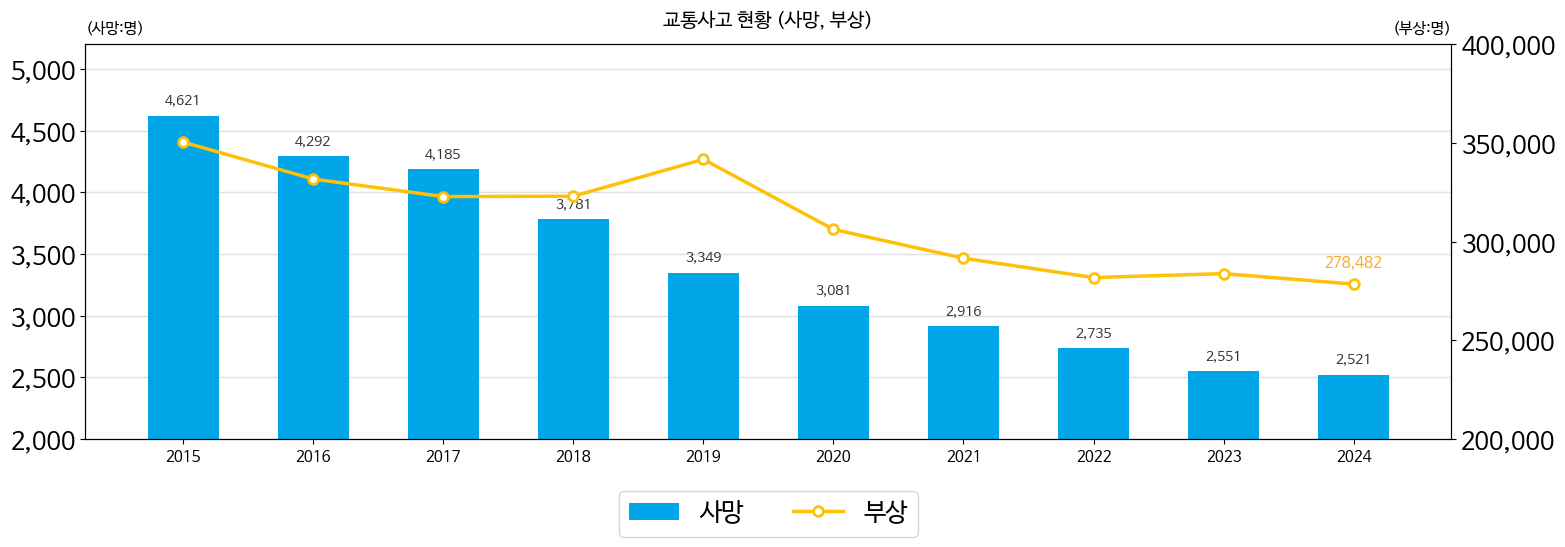

In [6]:
# 10년간 교통사고 통계 (2015 ~ 2024)
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.rcParams["font.family"] = "NanumGothic"
plt.rcParams["axes.unicode_minus"] = False

years_for_plot = [col for col in df_year.columns if str(col).isdigit()]

death_row = df_year[(df_year['분석지표'] == '사망자수') & (df_year['연도'] == '전체')]
death = death_row[years_for_plot].iloc[0]

injury_row = df_year[(df_year['분석지표'] == '부상자수') & (df_year['연도'] == '전체')]
injury = injury_row[years_for_plot].iloc[0]

years = [str(y) for y in years_for_plot]

fig, ax1 = plt.subplots(figsize=(16, 6))

# 왼쪽: 막대(사망)
bars = ax1.bar(years, death, color="#00A6E7", width=0.55, label="사망")

ax1.set_ylim(2000, 5200)
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x):,}"))
ax1.grid(axis="y", color="#E0E0E0", linestyle="-", linewidth=1)
ax1.set_axisbelow(True)

# 사망자 수 라벨
for bar in bars:
    height = bar.get_height()
    ax1.text(
        bar.get_x() + bar.get_width() / 2,
        height + 60,
        f"{int(height):,}",
        ha="center",
        va="bottom",
        fontsize=10,
        color="#333333"
    )

# 오른쪽: 선(부상)
ax2 = ax1.twinx()
line = ax2.plot(
    years, injury,
    color="#FFC107",
    marker="o",
    markersize=7,
    markerfacecolor="white",
    markeredgewidth=2,
    linewidth=2.5,
    label="부상"
)

ax2.set_ylim(200000, 400000)
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x):,}"))


min_value = injury.min()
min_year_index = injury.argmin()
min_year = years[min_year_index]

ax2.text(
    min_year,
    min_value + 7000,
    f"{int(min_value):,}",
    ha="center",
    va="bottom",
    fontsize=11,
    fontweight="bold",
    color="#F9A825"
)

# 축 라벨
ax1.set_ylabel("")
ax2.set_ylabel("")

ax1.text(0.0, 1.02, "(사망:명)", transform=ax1.transAxes,
         ha="left", va="bottom", fontsize=11)
ax2.text(1.0, 1.02, "(부상:명)", transform=ax2.transAxes,
         ha="right", va="bottom", fontsize=11)


ax1.set_xticks(years_for_plot)
ax1.set_xticklabels(years, fontsize=11)
ax1.set_title("교통사고 현황 (사망, 부상)", fontsize=14, pad=14)

# 범례
handles = [bars, line[0]]
labels = ["사망", "부상"]
ax1.legend(
    handles, labels,
    loc="lower center",
    bbox_to_anchor=(0.5, -0.28),
    ncol=2,
    frameon=True
)

plt.tight_layout()
plt.show()

In [39]:
#교통사고 통계 10년간
import pandas as pd

df_raw = pd.read_excel("/content/교통사고통계(연도별).xlsx",header=0)

# 연도 컬럼만 추출
year_cols = [col for col in df_raw.columns if str(col).isdigit()]

# 필요 행만 필터링
df_filtered = df_raw[
    (df_raw["분석지표"].isin(["사고건수", "부상자수", "사망자수"])) &
    (df_raw["연도"].isin(["전체", "1일평균"]))
]

# Wide → Long 변환 (melt)
df_long = df_filtered.melt(
    id_vars=["분석지표", "연도"],
    value_vars=year_cols,
    var_name="년도",
    value_name="값"
)

# 컬럼 재구성 및 타입 변환
df_long["지표"] = df_long["분석지표"] + "_" + df_long["연도"]
df_long["년도"] = df_long["년도"].astype(int)

#Pivot + 연도 기준 테이블 생성안전거리 미확보
df_year = df_long.pivot(
    index="년도",
    columns="지표",
    values="값"
).reset_index()


In [46]:
import pandas as pd

# Load df_month with the correct header
df_month_raw = pd.read_excel("/content/교통사고통계_월별.xlsx", header=1)

# Get years from 2020 to 2024 (last 5 years for '최근 5년 평균')
years = [col for col in df_month_raw.columns if str(col).isdigit() and int(col) >= 2020]
years_str = [str(int(y)) for y in years]

# Prepare accident data
df_acc = df_month_raw[df_month_raw.iloc[:, 1] == "사고[건]"]
df_acc = df_acc[df_acc.iloc[:, 0] != "합계"].copy()
df_acc["월"] = df_acc.iloc[:, 0].astype(str).str.replace("월", "") + "월"

df_acc_long = df_acc.melt(
    id_vars=["월"],
    value_vars=years,
    var_name="연도",
    value_name="값"
)

df_acc_long["연도"] = df_acc_long["연도"].astype(int)
df_acc_long["값"] = pd.to_numeric(df_acc_long["값"].astype(str).str.replace(",", ""), errors='coerce').fillna(0).astype(int)
df_acc_5_years = df_acc_long

# Prepare fatality data
df_fatal = df_month_raw[df_month_raw.iloc[:, 1] == "사망[명]"]
df_fatal = df_fatal[df_fatal.iloc[:, 0] != "합계"].copy()
df_fatal["월"] = df_fatal.iloc[:, 0].astype(str).str.replace("월", "") + "월"

df_fatal_long = df_fatal.melt(
    id_vars=["월"],
    value_vars=years,
    var_name="연도",
    value_name="사망자수"
)

df_fatal_long["연도"] = df_fatal_long["연도"].astype(int)
df_fatal_long["사망자수"] = pd.to_numeric(df_fatal_long["사망자수"].astype(str).str.replace(",", ""), errors='coerce').fillna(0).astype(int)

# Merge accident and fatality data to calculate fatality rate (치명도)
df_merged = pd.merge(df_acc_long, df_fatal_long, on=["월", "연도"], how="left")
df_merged["치명도(%)"] = (df_merged["사망자수"] / df_merged["값"] * 100).fillna(0)

df_fatal_5_years = df_merged

/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


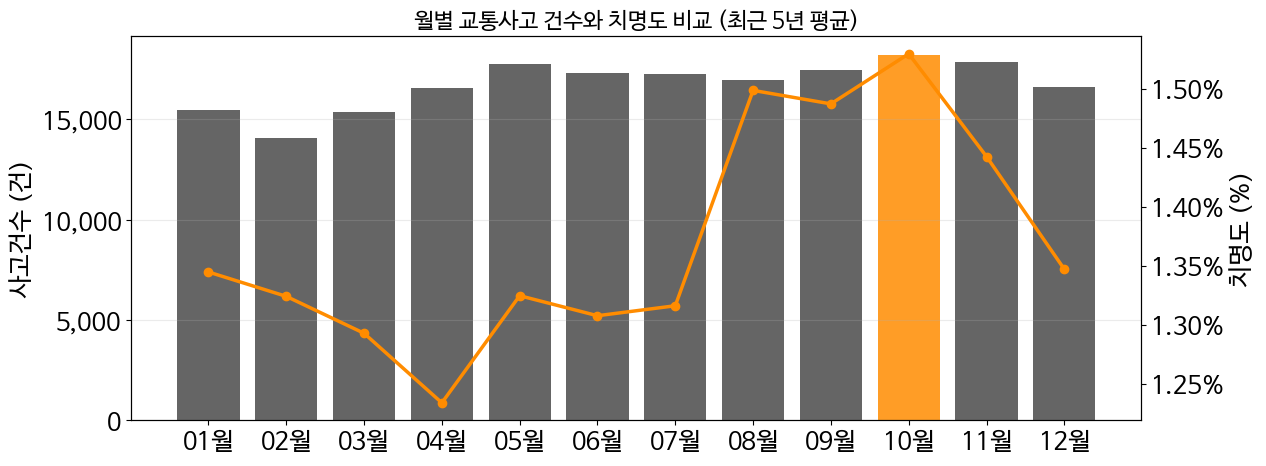

In [47]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
month_order = [f"{i:02d}월" for i in range(1, 13)]

df_month_avg = (

    df_acc_5_years # Use df_acc_5_years for 5-year average
    .groupby("월")["값"] # '값' is the value column in df_acc_5_years
    .mean()
    .reindex(month_order)
    .reset_index()
)

df_month_fatal_avg = (
    df_fatal_5_years # Use df_fatal_5_years
    .groupby("월")["치명도(%)"]
    .mean()
    .reindex(month_order)
    .reset_index()
)

df_month_fatal_avg.head()

df_month_avg.columns = ["월", "월평균사고건수"]

BASE_COLOR = "#4a4a4a"
HIGHLIGHT  = "#ff8c00"

max_acc   = df_month_avg["월평균사고건수"].max()
max_fatal = df_month_fatal_avg["치명도(%)"].max()

fig, ax1 = plt.subplots(figsize=(13, 5))

# 왼쪽 축: 사고건수
bars = ax1.bar(
    df_month_avg["월"],
    df_month_avg["월평균사고건수"],
    color=[
        HIGHLIGHT if v == max_acc else BASE_COLOR
        for v in df_month_avg["월평균사고건수"]
    ],
    alpha=0.85
)

ax1.set_ylabel("사고건수 (건)")
ax1.yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, _: f"{int(x):,}")
)
ax1.grid(axis="y", alpha=0.25)

# 오른쪽 축: 치명도
ax2 = ax1.twinx()
ax2.plot(
    df_month_fatal_avg["월"],
    df_month_fatal_avg["치명도(%)"],
    color=HIGHLIGHT,
    marker="o",
    linewidth=2.5
)

ax2.set_ylabel("치명도 (%)")
ax2.yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, _: f"{x:.2f}%")
)

plt.title(
    "월별 교통사고 건수와 치명도 비교 (최근 5년 평균)",
    fontsize=16
)

plt.tight_layout()
plt.show()

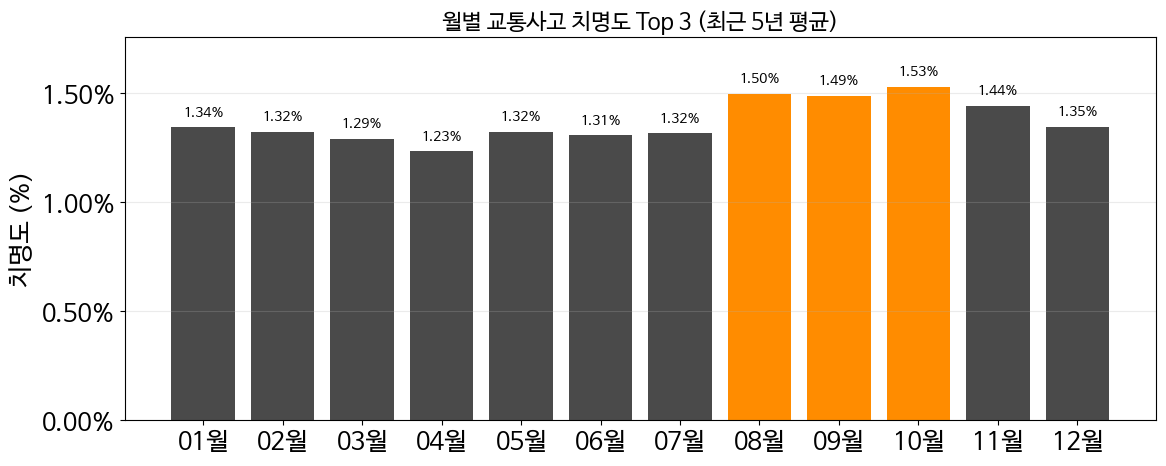

In [48]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 치명도 Top 3 월
df_fatal_top3 = (
    df_month_fatal_avg
    .sort_values("치명도(%)", ascending=False)
    .head(3)
    .reset_index(drop=True)
)

BASE_COLOR = "#4a4a4a"
HIGHLIGHT  = "#ff8c00"

top3_months = df_fatal_top3["월"].tolist()
max_val = df_month_fatal_avg["치명도(%)"].max()

colors = [
    HIGHLIGHT if m in top3_months else BASE_COLOR
    for m in df_month_fatal_avg["월"]
]

fig, ax = plt.subplots(figsize=(12, 5))

bars = ax.bar(
    df_month_fatal_avg["월"],
    df_month_fatal_avg["치명도(%)"],
    color=colors
)

ax.set_title(
    "월별 교통사고 치명도 Top 3 (최근 5년 평균)",
    fontsize=16
)

ax.set_ylabel("치명도 (%)")
ax.yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, _: f"{x:.2f}%")
)

ax.set_ylim(0, max_val * 1.15)
ax.grid(axis="y", alpha=0.25)

for b in bars:
    h = b.get_height()
    ax.text(
        b.get_x() + b.get_width() / 2,
        h + max_val * 0.02,
        f"{h:.2f}%",
        ha="center",
        va="bottom",
        fontsize=10
    )

plt.tight_layout()
plt.show()

In [50]:
import pandas as pd

# 사고 / 사망 분리
df_acc = df_weather[df_weather["연도"] == "사고[건]"].copy()
df_death = df_weather[df_weather["연도"] == "사망[명]"].copy()

# 월 컬럼만 추출
month_cols = [c for c in df_weather.columns if "2024." in c]

# long-format
df_acc_long = df_acc.melt(
    id_vars=["기상상태"],
    value_vars=month_cols,
    var_name="월",
    value_name="사고건수"
)

df_death_long = df_death.melt(
    id_vars=["기상상태"],
    value_vars=month_cols,
    var_name="월",
    value_name="사망자수"
)

# 숫자형 변환
for df_ in [df_acc_long, df_death_long]:
    df_[df_.columns[-1]] = (
        df_[df_.columns[-1]]
        .astype(str)
        .str.replace(",", "")
        .astype(float)
    )


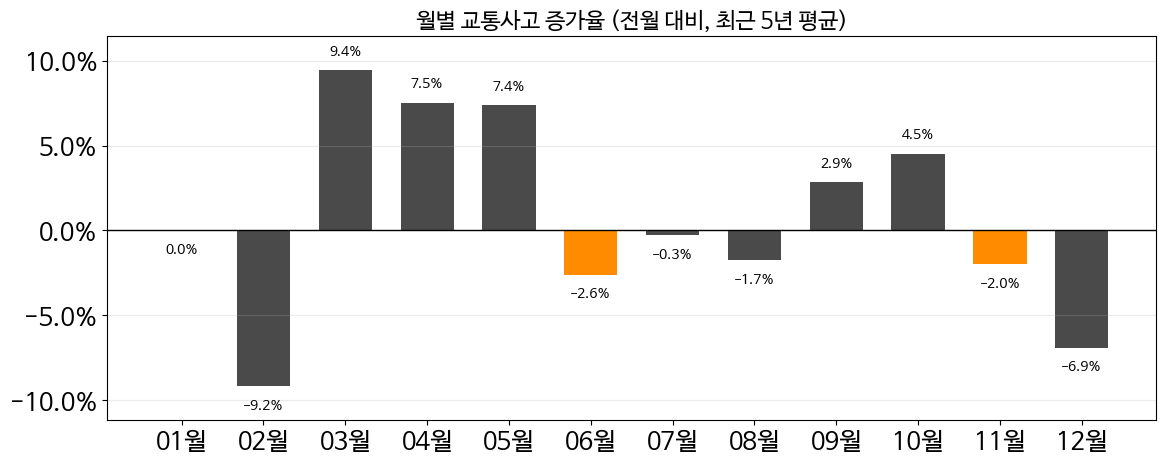

In [57]:
fig, ax = plt.subplots(figsize=(12, 5))

bars = ax.bar(
    df_month["월"],
    df_month["증가율(%)"],
    color=colors,
    width=0.65
)

# 기준선
ax.axhline(0, color="black", linewidth=1)

# 제목
ax.set_title(
    "월별 교통사고 증가율 (전월 대비, 최근 5년 평균)",
    fontsize=16
)

# y축 포맷
ax.yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, _: f"{x:.1f}%")
)

y_max = df_month["증가율(%)"].max()
y_min = df_month["증가율(%)"].min()
ax.set_ylim(y_min - 2, y_max + 2)

ax.grid(axis="y", alpha=0.25)

# 라벨
for b in bars:
    h = b.get_height()
    if pd.notna(h):
        ax.text(
            b.get_x() + b.get_width() / 2,
            h + (0.6 if h > 0 else -0.8),
            f"{h:.1f}%",
            ha="center",
            va="bottom" if h > 0 else "top",
            fontsize=10
        )

plt.tight_layout()
plt.show()

In [52]:
import pandas as pd

# df_acc_5_years는 이미 전처리된 월별 사고 건수 데이터를 가지고 있음.
# df_month_avg를 사용하여 월평균사고건수를 계산합니다.
month_order = [f"{i:02d}월" for i in range(1, 13)]

df_month_avg = (
    df_acc_5_years
    .groupby("월")["값"]
    .mean()
    .reindex(month_order)
    .reset_index()
)
df_month_avg.columns = ["월", "월평균사고건수"]

# 전월 대비 증가율 계산
df_month_avg["전월"] = df_month_avg["월평균사고건수"].shift(1)
df_month_avg["증가율(%)"] = (
    (df_month_avg["월평균사고건수"] - df_month_avg["전월"]) /
    df_month_avg["전월"] * 100
).fillna(0)

# 첫 달(1월)의 경우 전월이 없으므로, 첫 달 증가율은 0으로 처리하거나 다른 방식으로 정의 가능. 여기서는 0으로 처리
# df_month_avg.loc[0, "증가율(%)"] = 0

# 필요한 컬럼만 추출하여 df_month 재생성
df_month = df_month_avg[["월", "증가율(%)"]].copy()

display(df_month.head())

,월,증가율(%)
0,01월,0.000000
1,02월,-9.178082
2,03월,9.432539
3,04월,7.528573
4,05월,7.360606


In [53]:
df_weather_fatal = pd.merge(
    df_acc_long,
    df_death_long,
    on=["기상상태", "월"],
    how="inner"
)

# 치명도 계산
df_weather_fatal["치명도(%)"] = (
    df_weather_fatal["사망자수"] / df_weather_fatal["사고건수"] * 100
)


In [54]:
# 분석 대상 날씨
target_weather = ["맑음", "비", "눈"]

df_weather_summary = (
    df_weather_fatal[df_weather_fatal["기상상태"].isin(target_weather)]
    .groupby("기상상태")[["사고건수", "사망자수", "치명도(%)"]]
    .mean()
    .reset_index()
)

df_weather_summary


,기상상태,사고건수,사망자수,치명도(%)
0,눈,94.25,1.166667,2.490238
1,맑음,14424.50,176.416667,1.214433
2,비,1050.25,15.916667,1.585841


In [55]:
# 기상상태별 사고건수 (2024년)
df_acc_weather = df_weather[
    df_weather["연도"] == "사고[건]"
].copy()

# 숫자형 변환
df_acc_weather["2024"] = (
    df_acc_weather["2024"]
    .astype(str)
    .str.replace(",", "")
    .astype(int)
)

# 맑음 + 합계 제외
df_plot = df_acc_weather[
    ~df_acc_weather["기상상태"].isin(["합계", "맑음"])
].copy()

# 사고율(%) 계산
total_acc = df_plot["2024"].sum()
df_plot["사고율(%)"] = df_plot["2024"] / total_acc * 100

# 사고율 기준 정렬
df_plot = df_plot.sort_values("사고율(%)", ascending=False)

df_plot


,기상상태,연도,2024,2024.1,2024.2,2024.3,2024.4,2024.5,2024.6,2024.7,2024.8,2024.9,2024.10,2024.11,2024.12,사고율(%)
10,비,사고[건],12603,742,1754,1007,1039,1224,888,1846,561,1284,1345,755,158,54.194797
7,흐림,사고[건],6863,704,842,525,483,333,343,989,385,504,664,604,487,29.511933
19,기타/불명,사고[건],2543,216,205,221,201,174,151,175,211,227,249,246,267,10.935283
16,눈,사고[건],1131,360,204,16,0,0,0,0,0,0,0,416,135,4.863470
13,안개,사고[건],115,6,13,18,5,3,0,5,2,3,35,17,8,0.494517


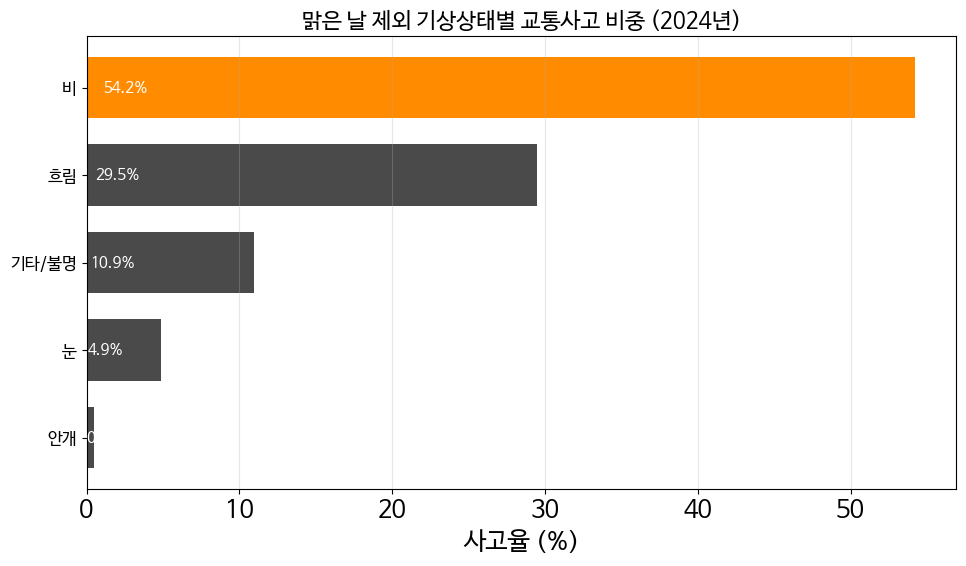

In [56]:
import matplotlib.pyplot as plt
import numpy as np

labels = df_plot["기상상태"]
values = df_plot["사고율(%)"]

BASE_COLOR = "#4a4a4a"
HIGHLIGHT  = "#ff8c00"

colors = [HIGHLIGHT if v == values.max() else BASE_COLOR for v in values]

y = np.arange(len(labels))

plt.figure(figsize=(10, 6))
plt.barh(y, values, color=colors, height=0.7)

# 퍼센트 라벨
for i, v in enumerate(values):
    plt.text(
        v * 0.02,
        i,
        f"{v:.1f}%",
        va="center",
        ha="left",
        color="white",
        fontsize=11,
        fontweight="bold"
    )

plt.yticks(y, labels, fontsize=12)
plt.gca().invert_yaxis()
plt.xlabel("사고율 (%)")
plt.title("맑은 날 제외 기상상태별 교통사고 비중 (2024년)", fontsize=16)
plt.grid(axis="x", alpha=0.3)

plt.tight_layout()
plt.show()


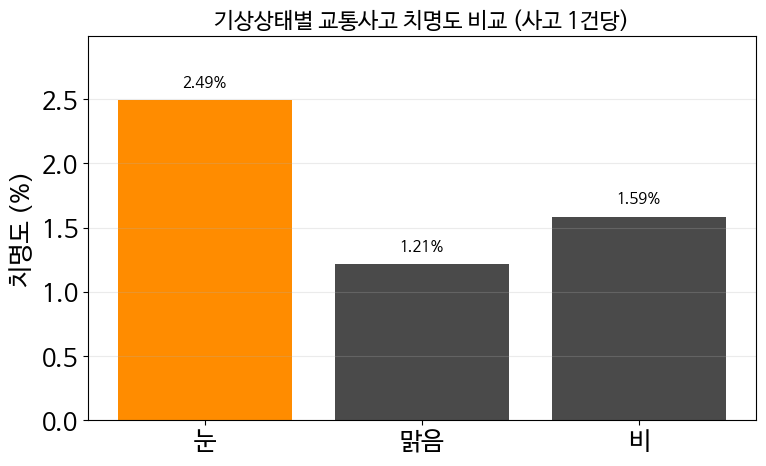

In [25]:
import matplotlib.pyplot as plt

BASE_COLOR = "#4a4a4a"
HIGHLIGHT  = "#ff8c00"

max_val = df_weather_summary["치명도(%)"].max()

colors = [
    HIGHLIGHT if v == max_val else BASE_COLOR
    for v in df_weather_summary["치명도(%)"]
]

fig, ax = plt.subplots(figsize=(8, 5))

bars = ax.bar(
    df_weather_summary["기상상태"],
    df_weather_summary["치명도(%)"],
    color=colors
)

ax.set_title("기상상태별 교통사고 치명도 비교 (사고 1건당)", fontsize=16)

ax.set_ylabel("치명도 (%)")
ax.grid(axis="y", alpha=0.25)

ax.set_ylim(0, max_val * 1.2)

for b in bars:
    h = b.get_height()
    ax.text(
        b.get_x() + b.get_width() / 2,
        h + max_val * 0.03,
        f"{h:.2f}%",
        ha="center",
        va="bottom",
        fontsize=11
    )

plt.tight_layout()
plt.show()

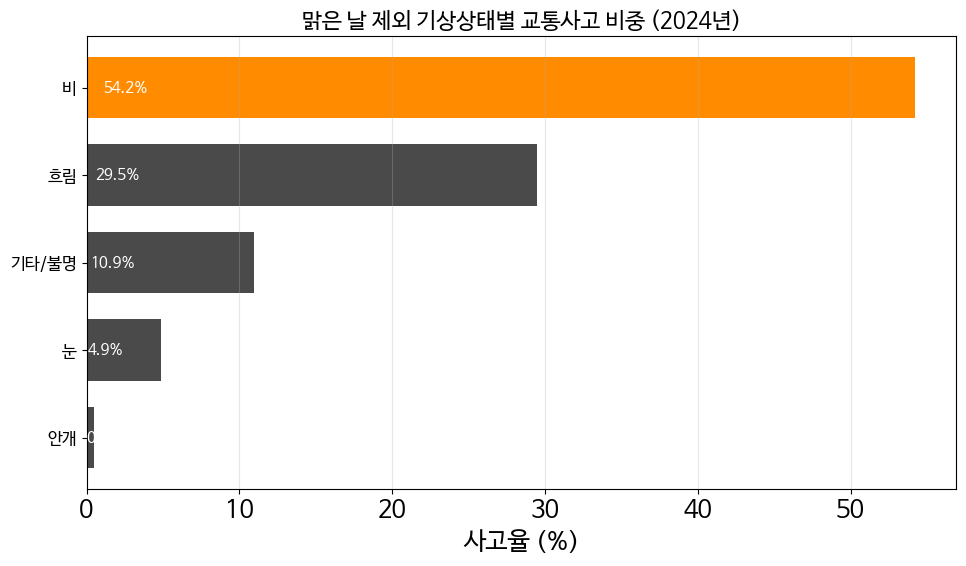

In [60]:
import matplotlib.pyplot as plt
import numpy as np

labels = df_plot["기상상태"]
values = df_plot["사고율(%)"]

BASE_COLOR = "#4a4a4a"
HIGHLIGHT  = "#ff8c00"

colors = [HIGHLIGHT if v == values.max() else BASE_COLOR for v in values]

y = np.arange(len(labels))

plt.figure(figsize=(10, 6))
plt.barh(y, values, color=colors, height=0.7)

# 퍼센트 라벨
for i, v in enumerate(values):
    plt.text(
        v * 0.02,
        i,
        f"{v:.1f}%",
        va="center",
        ha="left",
        color="white",
        fontsize=11,
        fontweight="bold"
    )

plt.yticks(y, labels, fontsize=12)
plt.gca().invert_yaxis()
plt.xlabel("사고율 (%)")
plt.title("맑은 날 제외 기상상태별 교통사고 비중 (2024년)", fontsize=16)
plt.grid(axis="x", alpha=0.3)

plt.tight_layout()
plt.show()


In [63]:
# 기상상태별 사고건수 (2024년)
df_acc_weather = df_weather[
    df_weather["연도"] == "사고[건]"
].copy()

# 숫자형 변환
df_acc_weather["2024"] = (
    df_acc_weather["2024"]
    .astype(str)
    .str.replace(",", "")
    .astype(int)
)

# 맑음 + 합계 제외
df_plot = df_acc_weather[
    ~df_acc_weather["기상상태"].isin(["합계", "맑음"])
].copy()

# 사고율(%) 계산
total_acc = df_plot["2024"].sum()
df_plot["사고율(%)"] = df_plot["2024"] / total_acc * 100

# 사고율 기준 정렬
df_plot = df_plot.sort_values("사고율(%)", ascending=False)

df_plot


,기상상태,연도,2024,2024.1,2024.2,2024.3,2024.4,2024.5,2024.6,2024.7,2024.8,2024.9,2024.10,2024.11,2024.12,사고율(%)
10,비,사고[건],12603,742,1754,1007,1039,1224,888,1846,561,1284,1345,755,158,54.194797
7,흐림,사고[건],6863,704,842,525,483,333,343,989,385,504,664,604,487,29.511933
19,기타/불명,사고[건],2543,216,205,221,201,174,151,175,211,227,249,246,267,10.935283
16,눈,사고[건],1131,360,204,16,0,0,0,0,0,0,0,416,135,4.863470
13,안개,사고[건],115,6,13,18,5,3,0,5,2,3,35,17,8,0.494517


In [71]:
import pandas as pd

df_weather_fatal_sorted = df_weather_fatal.sort_values(by=['기상상태', '월']).copy()

df_weather_fatal_sorted['사고증가율(%)'] = df_weather_fatal_sorted.groupby('기상상태')['사고건수'].pct_change() * 100
df_weather_fatal_sorted['사고증가율(%)'] = df_weather_fatal_sorted['사고증가율(%)'].fillna(0)

df_month = df_weather_fatal_sorted[['기상상태', '월', '사고증가율(%)']].copy()

print(df_month.head())

     기상상태        월   사고증가율(%)
6   기타/불명   2024.1   0.000000
69  기타/불명  2024.10  15.277778
76  기타/불명  2024.11  -1.204819
83  기타/불명  2024.12   8.536585
13  기타/불명   2024.2 -23.220974


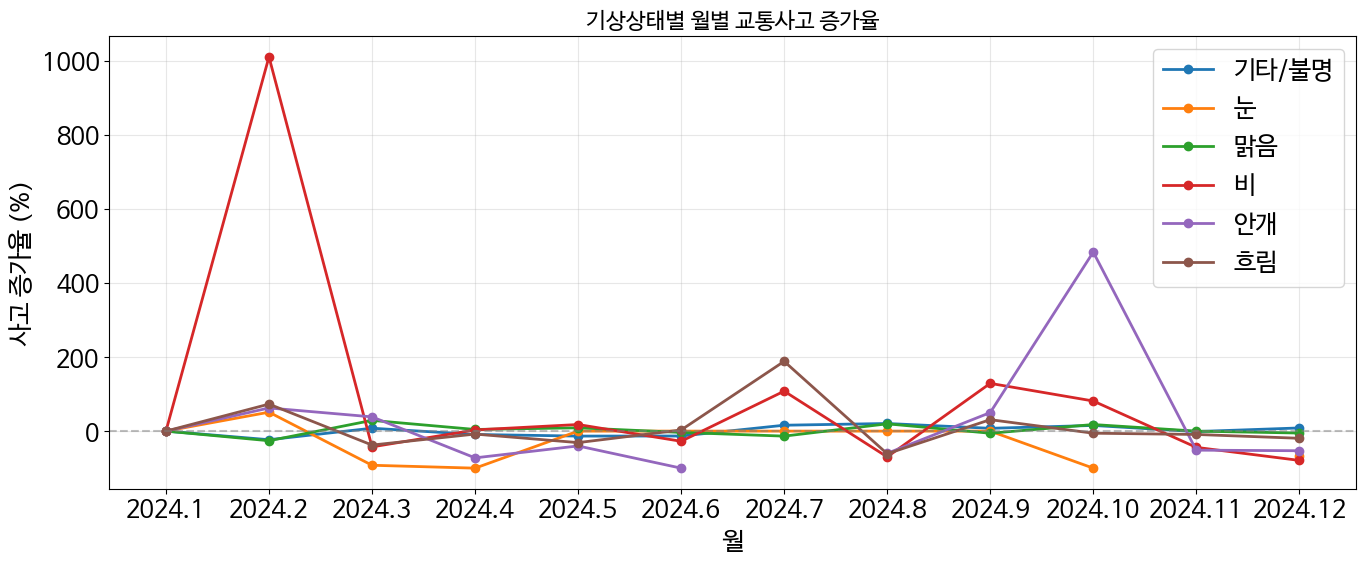

In [72]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))

for weather in df_month["기상상태"].unique():
    if weather == "합계":
        continue
    subset = df_month[df_month["기상상태"] == weather].copy()

    subset['sort_key'] = subset['월'].apply(lambda x: int(x.split('.')[1]))
    subset = subset.sort_values(by='sort_key')

    plt.plot(
        subset["월"],
        subset["사고증가율(%)"],
        marker="o",
        linewidth=2,
        label=weather
    )

plt.axhline(0, color="gray", linestyle="--", alpha=0.5)
plt.title("기상상태별 월별 교통사고 증가율", fontsize=16)
plt.ylabel("사고 증가율 (%)")
plt.xlabel("월")
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()